In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import preprocessing


In [ ]:
df=pd.read_csv("/content/heart_disease.csv")

In [ ]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,FALSE,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,FALSE,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,FALSE,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,FALSE,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,TRUE,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,FALSE,1.5,upsloping,fixed defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,TRUE,3.0,flat,fixed defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,TRUE,2.5,downsloping,fixed defect,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,normal,4


In [127]:
df.shape

(908, 13)

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,FALSE,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,FALSE,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,FALSE,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,FALSE,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,TRUE,1.5,flat,fixed defect,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [ ]:
df["oldpeak"]=df["oldpeak"].fillna(df["oldpeak"].mean())

In [ ]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,FALSE,2.300000,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,FALSE,0.000000,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,FALSE,0.400000,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,FALSE,0.000000,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,TRUE,1.500000,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,FALSE,1.500000,upsloping,fixed defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,TRUE,3.000000,flat,fixed defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,TRUE,2.500000,downsloping,fixed defect,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,0.891253,downsloping,normal,4


In [ ]:
df["thal"].value_counts()

,count
thal,
reversable defect,363
normal,328
fixed defect,217


In [ ]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0
exang,0
oldpeak,0


In [86]:
# Example: let’s say your target column is 'target'
y = df['num']  # Replace with your actual target column name
X = df.drop('num', axis=1)

# Encode categorical columns if needed
# For example, using get_dummies
X = pd.get_dummies(X,drop_first=True)
label_encoder=preprocessing.LabelEncoder()




In [87]:
Y

,0
0,0
1,0
2,0
3,0
4,0
...,...
903,4
904,4
905,4
906,4


In [88]:
X

,age,trestbps,chol,fbs,thalch,oldpeak,sex_Male,cp_atypical angina,cp_non-anginal,cp_typical angina,restecg_normal,restecg_st-t abnormality,exang_TRUE,exang_TURE,slope_flat,slope_upsloping,thal_normal,thal_reversable defect
0,63,145,233,True,150,2.300000,True,False,False,True,False,False,False,False,False,False,False,False
1,41,135,203,False,132,0.000000,True,True,False,False,True,False,False,False,True,False,False,False
2,57,140,192,False,148,0.400000,True,False,False,False,True,False,False,False,True,False,False,False
3,52,118,186,False,190,0.000000,True,False,False,True,False,False,False,False,True,False,False,False
4,57,110,201,False,126,1.500000,True,False,False,False,True,False,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,125,0,False,120,1.500000,True,False,False,False,True,False,False,False,False,True,False,False
904,62,166,170,False,120,3.000000,True,False,False,False,False,True,True,False,True,False,False,False
905,56,170,0,False,123,2.500000,True,False,True,False,False,False,True,False,False,False,False,False
906,56,144,208,True,105,0.891253,True,False,True,False,False,True,False,True,False,False,True,False


In [89]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [90]:
X_train

,age,trestbps,chol,fbs,thalch,oldpeak,sex_Male,cp_atypical angina,cp_non-anginal,cp_typical angina,restecg_normal,restecg_st-t abnormality,exang_TRUE,exang_TURE,slope_flat,slope_upsloping,thal_normal,thal_reversable defect
84,42,120,295,False,162,0.000000,True,True,False,False,True,False,False,False,False,True,True,False
10,30,170,237,False,170,0.000000,False,False,False,True,False,True,False,False,False,False,False,False
617,74,140,237,True,94,0.000000,True,False,True,False,True,False,False,False,False,True,False,False
250,41,104,0,False,111,0.000000,True,False,False,False,False,True,False,False,True,False,False,True
869,49,137,142,False,68,0.891253,True,False,True,False,True,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,63,135,252,False,172,0.000000,False,False,True,False,False,False,False,False,False,True,True,False
270,37,120,260,False,130,0.000000,False,True,False,False,True,False,False,False,False,False,False,True
860,48,140,374,False,159,1.500000,True,False,False,False,True,False,True,False,False,True,False,True
435,57,154,232,False,164,0.000000,True,True,False,False,False,False,False,False,False,True,True,False


In [91]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [92]:
param_grid = {
    'max_depth': [2, 3, 4, 5, 6, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

In [93]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(
    estimator=dt_model,
    param_grid=param_grid,
    cv=5,              # 5-fold cross-validation
    scoring='accuracy', # or another metric
    n_jobs=-1          # use all cores
)


In [94]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, None],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [95]:
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'criterion': 'gini', 'max_depth': 2, 'min_samples_split': 2}


In [96]:
best_model = grid_search.best_estimator_
accuracy = best_model.score(X_test, y_test)
print("Test set accuracy:", accuracy)

Test set accuracy: 0.5439560439560439


In [97]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [98]:
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

In [99]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)


if len(set(y_test)) == 2:
    auc = roc_auc_score(y_test, y_proba)
    print("ROC-AUC Score:", auc)





Accuracy: 0.5439560439560439
Precision: 0.46014809343494323
Recall: 0.5439560439560439
F1 Score: 0.4952704248591025

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.81      0.76        89
           1       0.35      0.52      0.42        48
           2       0.00      0.00      0.00        22
           3       0.20      0.12      0.15        17
           4       0.00      0.00      0.00         6

    accuracy                           0.54       182
   macro avg       0.25      0.29      0.27       182
weighted avg       0.46      0.54      0.50       182

Confusion Matrix:
 [[72 16  0  1  0]
 [19 25  0  4  0]
 [ 3 16  0  3  0]
 [ 5 10  0  2  0]
 [ 2  4  0  0  0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

[Text(0.5081516595153963, 0.9722222222222222, 'x[12] <= 0.5\ngini = 0.698\nsamples = 726\nvalue = [310.0, 217.0, 87.0, 90.0, 22.0]'),
 Text(0.18432925290257446, 0.9166666666666666, 'x[2] <= 42.5\ngini = 0.592\nsamples = 455\nvalue = [268, 97, 44, 36, 10]'),
 Text(0.34624045620898536, 0.9444444444444444, 'True  '),
 Text(0.04252902574457345, 0.8611111111111112, 'x[4] <= 105.0\ngini = 0.731\nsamples = 80\nvalue = [11, 29, 23, 15, 2]'),
 Text(0.008076728924785462, 0.8055555555555556, 'x[4] <= 63.5\ngini = 0.68\nsamples = 16\nvalue = [2, 3, 1, 8, 2]'),
 Text(0.004038364462392731, 0.75, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1, 0, 0]'),
 Text(0.012115093387178193, 0.75, 'x[4] <= 79.5\ngini = 0.64\nsamples = 15\nvalue = [2, 3, 0, 8, 2]'),
 Text(0.008076728924785462, 0.6944444444444444, 'gini = 0.0\nsamples = 4\nvalue = [0, 0, 0, 4, 0]'),
 Text(0.016153457849570924, 0.6944444444444444, 'x[4] <= 93.5\ngini = 0.727\nsamples = 11\nvalue = [2, 3, 0, 4, 2]'),
 Text(0.008076728924785462, 0.638888

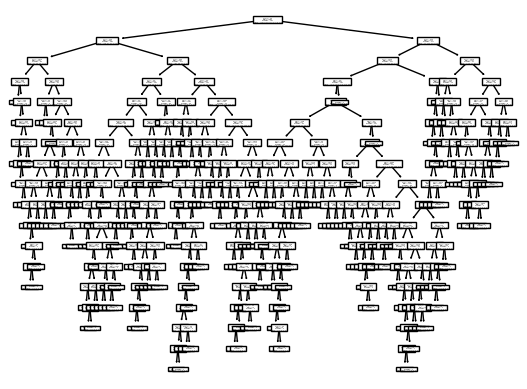

In [101]:
from sklearn import tree
tree.plot_tree(dt_model)

In [128]:
fn=["age","trestbps","chol","fbs","thalch","oldpeak","sex_Male","cp_atypical angina","cp_non-anginal","cp_typical angina","restecg_normal","restecg_st-t abnormality","exang_TRUE","exang_TURE","slope_flat","slpoe_upsloping","thal_normal","thal_reversable defect"]

In [129]:
cn=["0","1","2","3","4"]

[Text(0.5, 0.8333333333333334, 'exang_TRUE <= 0.5\ngini = 0.698\nsamples = 726\nvalue = [310.0, 217.0, 87.0, 90.0, 22.0]\nclass = 0'),
 Text(0.25, 0.5, 'chol <= 42.5\ngini = 0.592\nsamples = 455\nvalue = [268, 97, 44, 36, 10]\nclass = 0'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, 'gini = 0.731\nsamples = 80\nvalue = [11, 29, 23, 15, 2]\nclass = 1'),
 Text(0.375, 0.16666666666666666, 'gini = 0.491\nsamples = 375\nvalue = [257, 68, 21, 21, 8]\nclass = 0'),
 Text(0.75, 0.5, 'age <= 62.5\ngini = 0.713\nsamples = 271\nvalue = [42, 120, 43, 54, 12]\nclass = 1'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, 'gini = 0.671\nsamples = 217\nvalue = [36, 110, 32, 32, 7]\nclass = 1'),
 Text(0.875, 0.16666666666666666, 'gini = 0.737\nsamples = 54\nvalue = [6, 10, 11, 22, 5]\nclass = 3')]

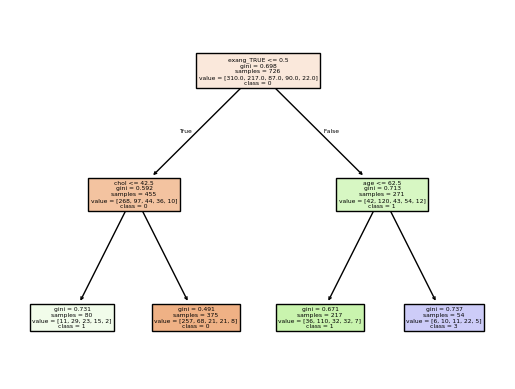

In [130]:
tree.plot_tree(best_model,
               class_names=cn,
               feature_names=fn,
               filled=True)

In [103]:
preds=dt_model.predict(X_test)
pd.Series(preds).value_counts()

,count
0,87
1,54
3,20
2,16
4,5


In [104]:
dt_model.feature_importances_

array([0.15213992, 0.09890578, 0.15495401, 0.01856651, 0.1501989 ,
       0.12823159, 0.01469574, 0.01507742, 0.02507376, 0.        ,
       0.02130313, 0.02427946, 0.08713949, 0.00923198, 0.02689215,
       0.00784815, 0.02011873, 0.04534327])

In [105]:
preds

array([3, 3, 0, 1, 1, 3, 1, 3, 1, 0, 3, 0, 0, 0, 0, 2, 0, 0, 0, 4, 0, 2,
       1, 1, 2, 4, 0, 0, 0, 0, 0, 2, 0, 1, 0, 1, 2, 1, 0, 3, 0, 0, 1, 0,
       2, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 3, 1, 0, 2, 0, 0, 1,
       2, 1, 0, 1, 0, 3, 3, 1, 0, 0, 1, 3, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 3, 0, 2, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 3, 1, 0, 0, 2, 1, 1, 2,
       2, 1, 1, 3, 0, 2, 1, 1, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 2, 3, 1, 0,
       1, 1, 0, 0, 1, 0, 4, 0, 0, 0, 0, 1, 4, 3, 0, 0, 3, 0, 1, 0, 0, 3,
       0, 3, 0, 0, 1, 0, 1, 1, 0, 0, 0, 3, 0, 0, 0, 0, 1, 1, 0, 0, 0, 2,
       1, 1, 1, 4, 3, 0])

In [116]:
pd.crosstab(y_test,preds)

col_0,0,1,2,3,4
num,,,,,
0,60,22,3,4,0
1,14,18,5,8,3
2,6,5,6,3,2
3,4,8,1,4,0
4,3,1,1,1,0


In [118]:
(60+18+6+4)/(60+22+3+4+14+18+5+8+3+6+5+5+9+8+6)

0.5